In [1]:
import instatools
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# this takes the account with given username, grabs all posts and dumps to a local json file with name based on that username

username = 'saraphimbodywork'

my_user = instatools.Instauser()
my_user.get_user_from_web(username)

all_data_list = my_user.get_all_data_list(username)

print(json.dumps(all_data_list))
outfilename = username + '_all_data_list.json'
thisoutfile = open(outfilename, 'w')
thisoutfile.write(json.dumps(all_data_list))


[{"id": "3254056387175354542", "shortcode": "C0ouwscrZCu", "width": 1080, "height": 1346, "display_url": "https://scontent-iad3-2.cdninstagram.com/v/t39.30808-6/409026753_18398585695017024_2797056593422575772_n.jpg?stp=dst-jpg_e35_p1080x1080_sh0.08&_nc_ht=scontent-iad3-2.cdninstagram.com&_nc_cat=100&_nc_ohc=d7ij0rcmrlgAX8LzIUD&edm=APU89FAAAAAA&ccb=7-5&oh=00_AfDfU15jL4QR8QcOKQsx2mK6TuqW9vVwlOn0B2w4dZNPDw&oe=6588D3F2&_nc_sid=bc0c2c", "tagged_user_list": {"edges": []}, "fact_check_overall_rating": null, "fact_check_information": null, "gating_info": null, "sharing_friction_info": {"should_have_sharing_friction": false, "bloks_app_url": null}, "media_overlay_info": null, "media_preview": "ACIqkiG7Bx1H6DirR+XjAAGR05+v/wBaobfgjJ6c8jp16f8A16sOD1LDHU//AFqyLIA4IG7jvnFRXB+U4x83pUoMb8cjsPX8vSoJY+w6E/yoAQKvt+v+NFIIW9P1opgXxbKvJOM9s/5PNUtT/dqmD3Ye3arAliVt3IZu+D/n+tUdTbzdpU5xkYxQhMjsJf3qrjdnIwffn+lbGAZORjaO/qT+v4VhWo8uQMeCpzWub4jvn9aGCLmF9ForM+2H0P5UUD0IEuH+h9eaZcMduT1J6/8A1zzUUf3fxqNjuznnjvQIeqqWPo

235023

In [3]:
# this data is available here for further exploration if desired, e.g. below lists all display urls for all posts

all_caption_list = []
for thispost in all_data_list:
  accessibility_caption = thispost.get('accessibility_caption','')
  #if accessibility_caption:
  #  print(accessibility_caption)
  caption = thispost.get('caption',{})
  if caption:
    caption_node = caption.get('node',{})
    if caption_node:
      caption_node_text = caption_node.get('text',{})
      if caption_node_text:
        all_caption_list.append(caption_node_text)

#print(all_caption_list)

for thiscaption in all_caption_list:
  if thiscaption:
    print(thiscaption)

allstring = ' '.join(all_caption_list)

tokens = allstring.split()

for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()

caption_words = ""
caption_words += " ".join(tokens)+" "

stopwords = set(STOPWORDS)



Autumnal fun, first draft of winter. #daytrip #wisconsinoutdoors #35mm #film
Mugwort & lavender stick. 💜 #calm #cleanse #center
A ferry good weekend! #doorcounty #ferry #madonna #jackfest
If you know me, you’ve heard me talk about the three Bobs. Bob Haddad has been a guiding light for me in Thai massage. This is me thinking of so many questions/what to do! This is from my last trip to Thailand & clearly balance is in play. Embrace the creativity of the practice & I hope to see you on the mat! In good spirits!
#chaingmai #thaibodywork #thaihealingalliance
Summer reunion! Afsaneh & I, once freshman nowadays UW-Madison alumnus.
#friends #fun #summertime #eastwilson
Sunday stroll.
#summertime #10speed #blazingstar #pumpitup #railroadtrestle #helmermyrestatepark
Happy International Women’s Day! I love these women and so grateful for all the strong women in my life!
@bikerbecker @lizzyc450 @danika_dutchcap  #shero #shebeast #yesqueen #ladyloves
Happy Birthday Clint! My best friend & partner

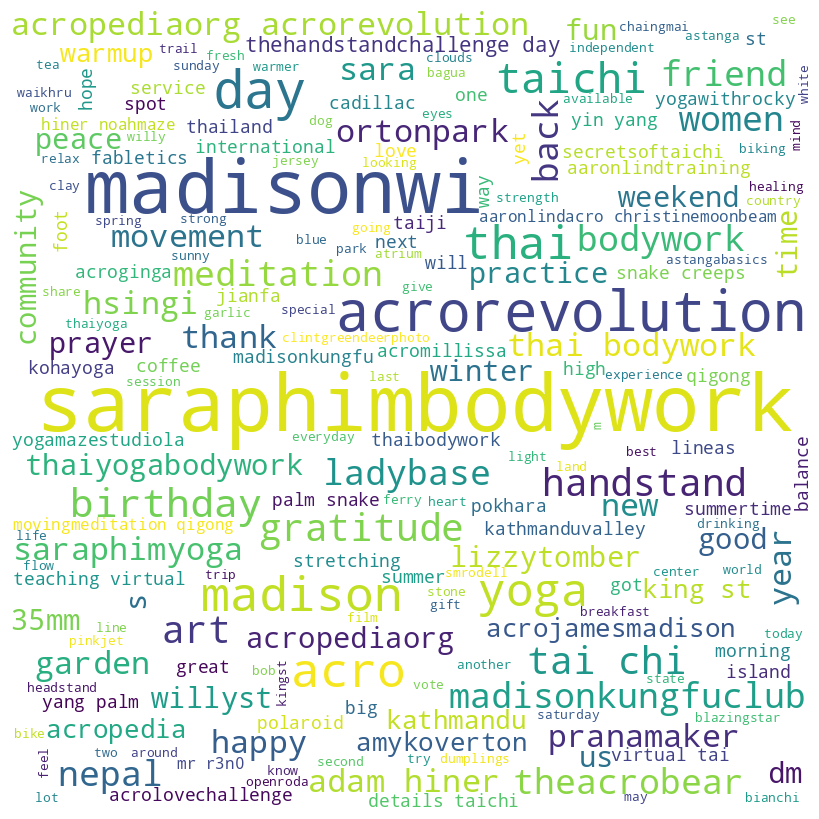

In [4]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(caption_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)